In [18]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True , grid= False)

In [17]:
pip install jupyterthemes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.5 MB/s eta 0:00:00


In [19]:
import os
for dirname, _, filenames in os.walk(r"C:\Users\Sourav dhaniya\Desktop\keggle\Twitter Sentimental alaysis"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [21]:
tweets_test_df = pd.read_csv('/test.csv')
tweets_train_df = pd.read_csv('/train.csv')

In [22]:
tweets_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [23]:
tweets_train_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [24]:
tweets_train_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [25]:
tweets_train_df = tweets_train_df.drop(['id'], axis=1)

In [26]:
tweets_train_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


<Axes: >

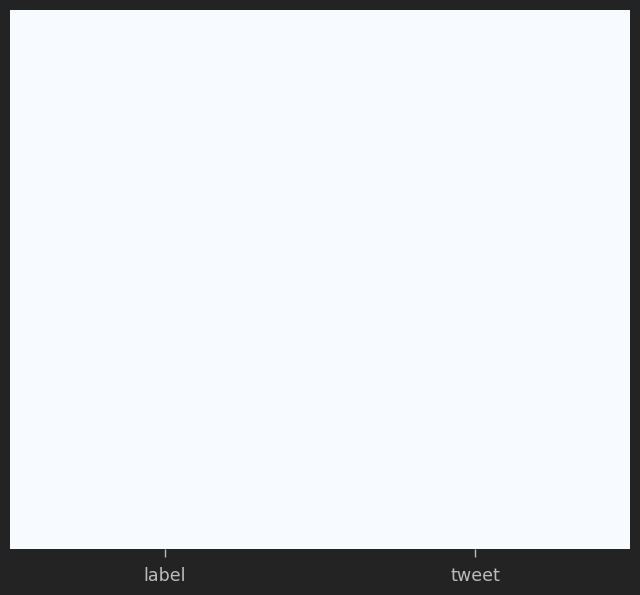

In [27]:
sns.heatmap(tweets_train_df.isnull(), yticklabels = False, cbar = False, cmap= "Blues")

array([[<Axes: title={'center': 'label'}>]], dtype=object)

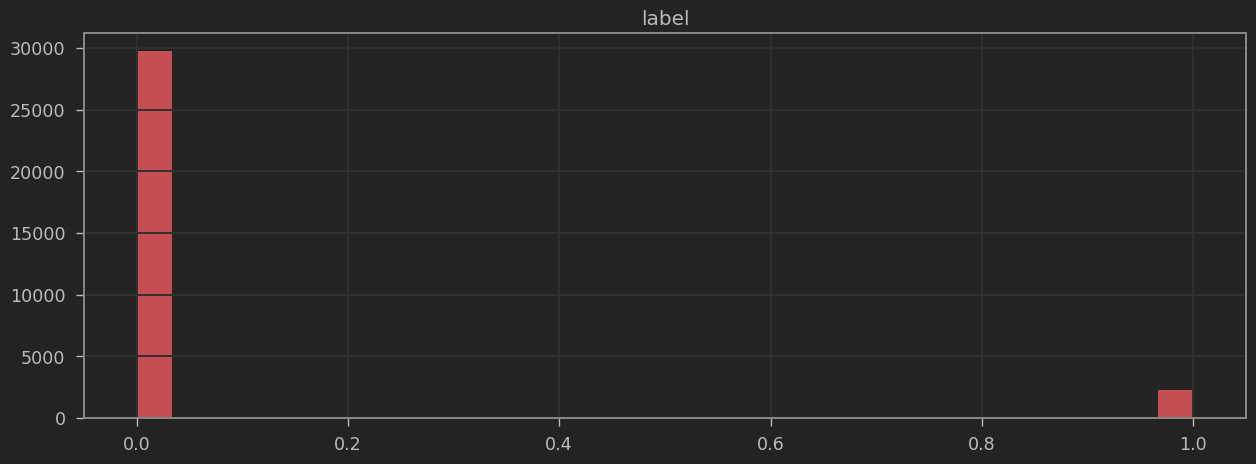

In [28]:
tweets_train_df.hist(bins = 30, figsize=(15,5), color='r')

<Axes: ylabel='count'>

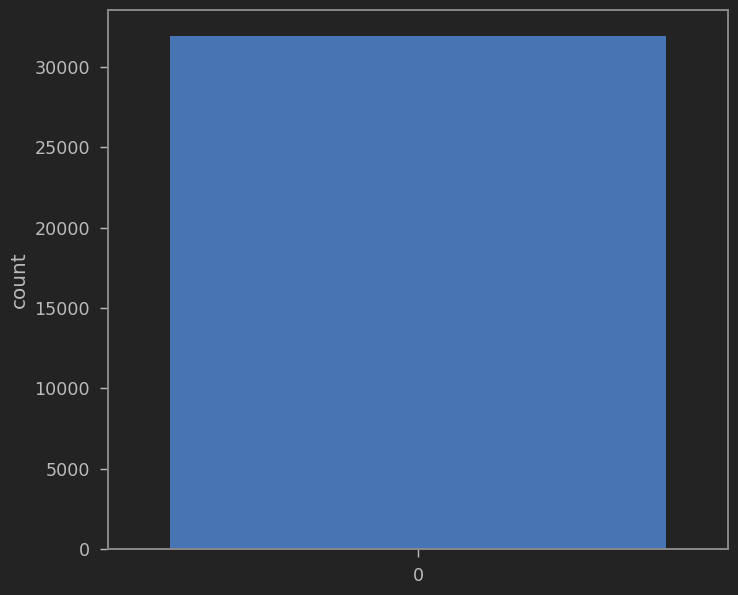

In [29]:
sns.countplot(tweets_train_df['label'], label='count')

In [30]:
tweets_train_df['length'] = tweets_train_df['tweet'].apply(len)

In [31]:
tweets_train_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


<Axes: ylabel='Frequency'>

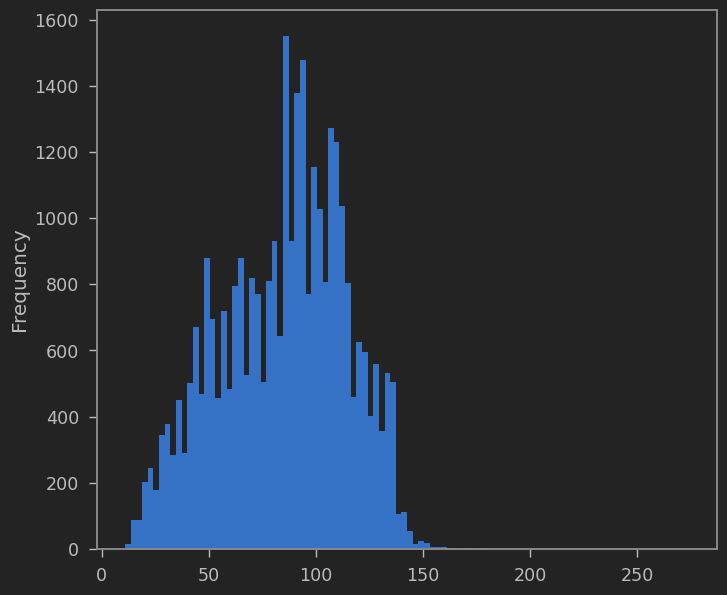

In [32]:
 tweets_train_df['length'].plot(bins=100, kind='hist')

In [33]:
tweets_train_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [34]:
tweets_train_df[tweets_train_df['length'] == 11]['tweet'].iloc[0]

'i love you '

In [35]:
positive = tweets_train_df[tweets_train_df['label'] == 0 ]

In [36]:
negative = tweets_train_df[tweets_train_df['label'] == 1 ]

In [37]:
 positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [38]:
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [39]:
sentences = tweets_train_df['tweet'].tolist()

In [40]:
sentences

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consume

In [41]:
len(sentences)

31962

In [42]:
sentences_as_one_string = " ".join(sentences)

In [43]:
from wordcloud import WordCloud

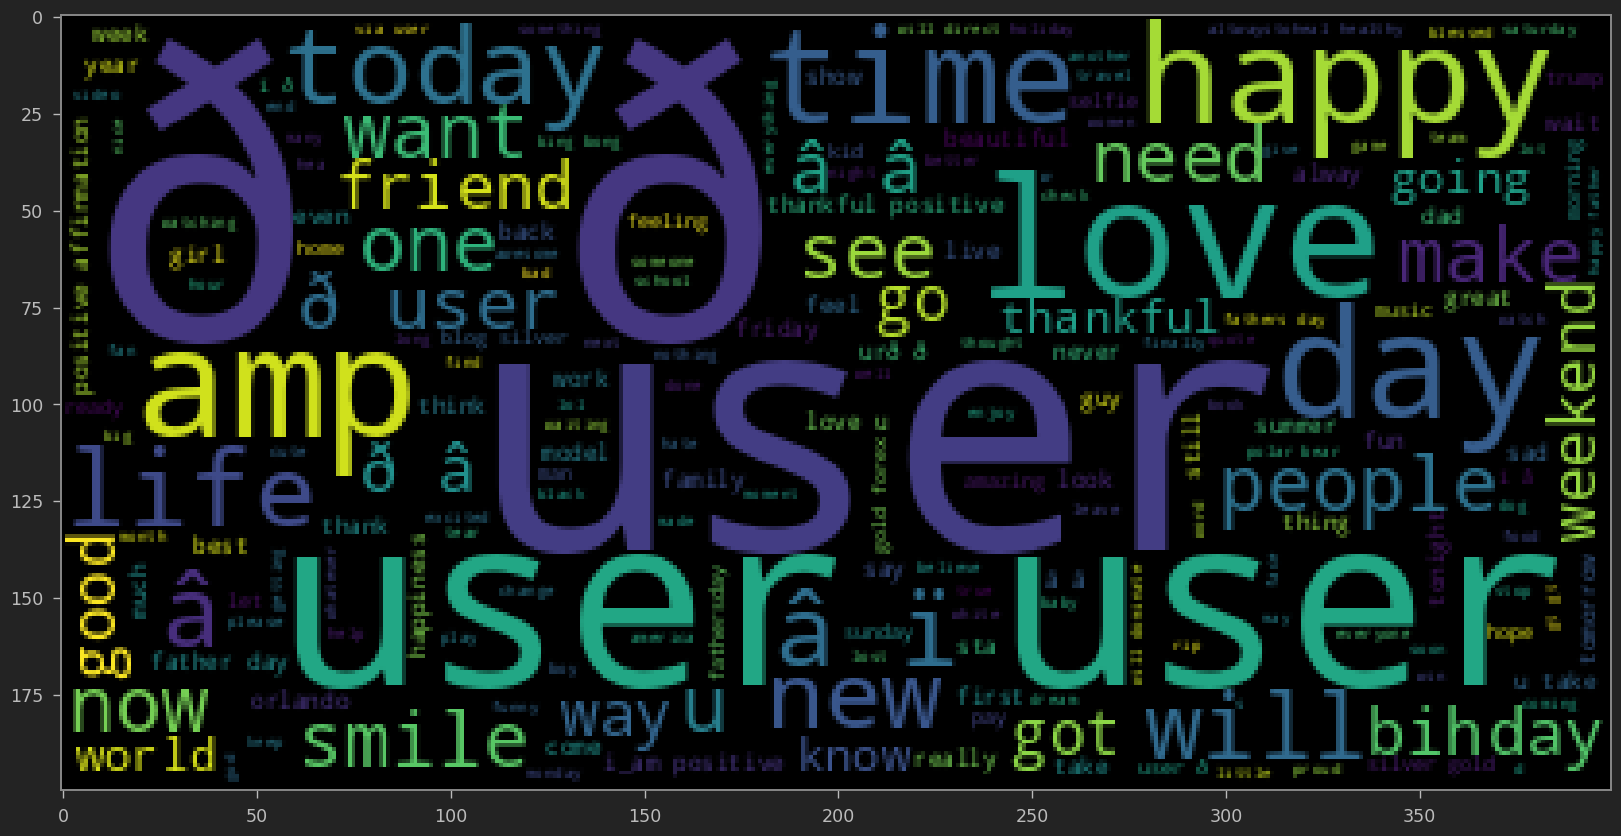

In [44]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [45]:
negative_list = negative['tweet'].tolist()

In [46]:
negative_sentences_as_one_string = " ".join(negative_list)

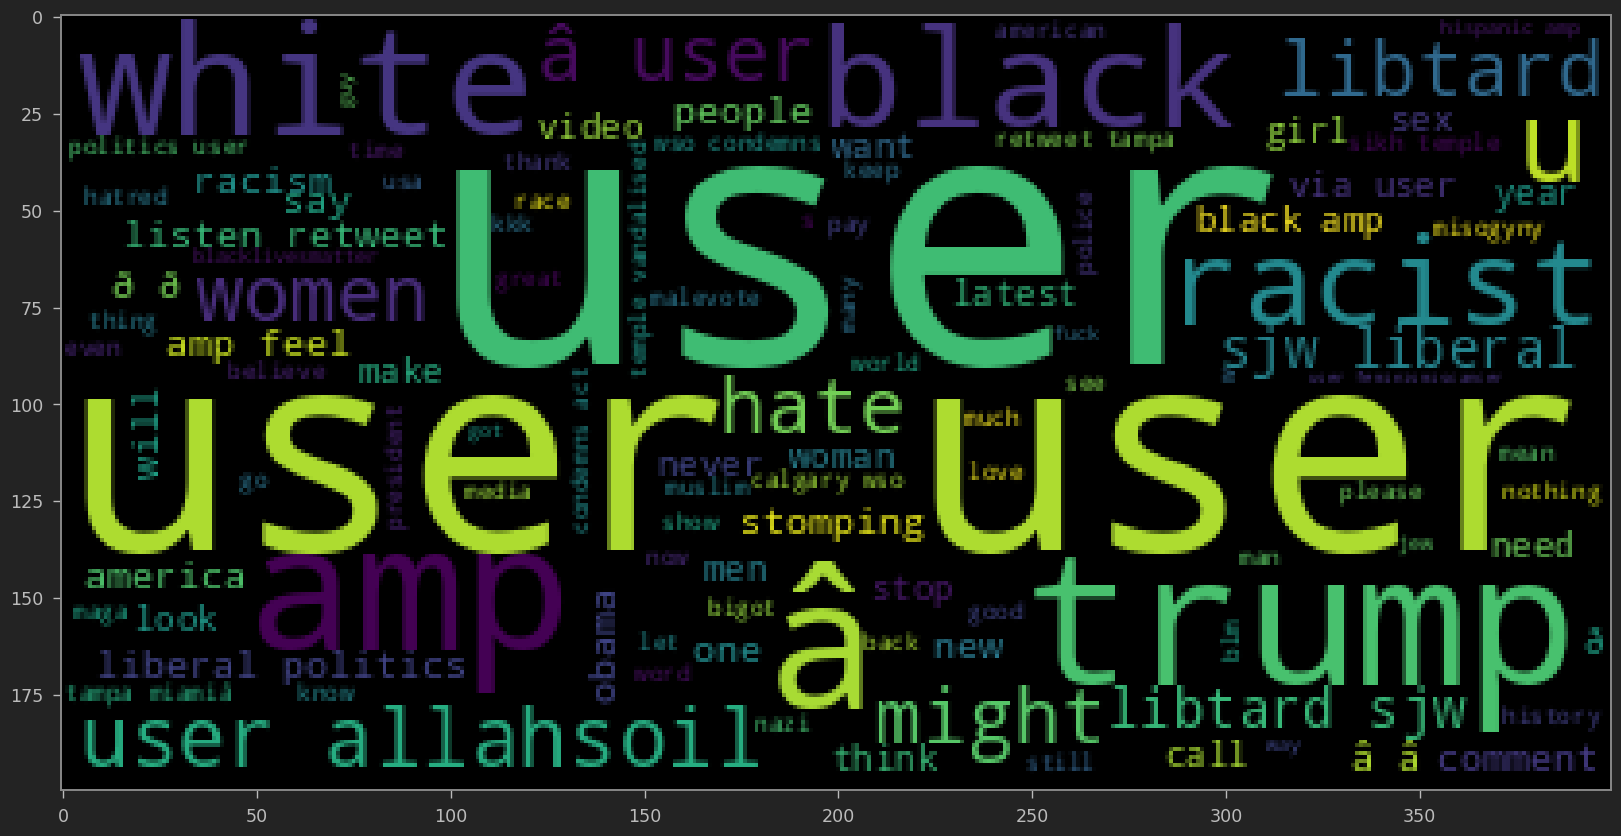

In [47]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

Perform data cleaning

In [48]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
Test = 'You are the most beautiful women i  ever meet :) and i want to be with u *_*'

In [50]:
Test_punct_removed = [ char for char in Test if char not in string.punctuation]

In [51]:
Test_punct_removed


['Y',
 'o',
 'u',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'm',
 'o',
 's',
 't',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'w',
 'o',
 'm',
 'e',
 'n',
 ' ',
 'i',
 ' ',
 ' ',
 'e',
 'v',
 'e',
 'r',
 ' ',
 'm',
 'e',
 'e',
 't',
 ' ',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'i',
 ' ',
 'w',
 'a',
 'n',
 't',
 ' ',
 't',
 'o',
 ' ',
 'b',
 'e',
 ' ',
 'w',
 'i',
 't',
 'h',
 ' ',
 'u',
 ' ']

In [52]:
Test_punct_removed_join = "".join(Test_punct_removed)

In [53]:
Test_punct_removed_join 


'You are the most beautiful women i  ever meet  and i want to be with u '

Remove punct using a different method 

In [54]:
Test_punct_removed = []
for  char in Test:
  if  char not in string.punctuation:
    Test_punct_removed.append(char)

Test_punct_removed_join = "".join(Test_punct_removed)    
Test_punct_removed_join

'You are the most beautiful women i  ever meet  and i want to be with u '

In [57]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [58]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
Test_punct_removed_join_clean = [ word for  word in Test_punct_removed_join.split() if word.lower() not  in stopwords.words('english') ]

In [60]:
Test_punct_removed_join_clean


['beautiful', 'women', 'ever', 'meet', 'want', 'u']

Remove  word and punctuation using a pipeline 

In [61]:
mini_challenge = "Here is a mini challenge, that will teach u how to remove punctuations and stopwords*_*"

In [62]:
challenge = [ char for  char in mini_challenge if char not in string.punctuation]
challenge= "".join(challenge)
challenge = [ word for word in challenge.split() if word.lower() not in stopwords.words('english')]

In [63]:
challenge

['mini', 'challenge', 'teach', 'u', 'remove', 'punctuations', 'stopwords']

Perform Tokenization

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper', 'This is the second paper', 'This is the third and last paper']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [65]:
print(vectorizer.get_feature_names_out())

['and' 'first' 'is' 'last' 'paper' 'second' 'the' 'third' 'this']


In [66]:
print(X.toarray())

[[0 1 1 0 1 0 1 0 1]
 [0 0 1 0 1 1 1 0 1]
 [1 0 1 1 1 0 1 1 1]]


In [67]:
def message_cleaning(message):
  Test_punct_removed = [char for char in message if char not in string.punctuation]
  Test_punct_removed_join = ''.join(Test_punct_removed)
  Test_punct_removed_join_clean = [ word for word in Test_punct_removed_join.split() if word.lower() not in stopwords.words('english') ]
  return Test_punct_removed_join_clean

In [68]:
tweets_df_clean = tweets_train_df['tweet'].apply(message_cleaning)

In [69]:
print(tweets_df_clean[5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [70]:
print(tweets_train_df['tweet'][5])

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [71]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype= 'uint8').fit_transform(tweets_train_df['tweet']).toarray()

In [72]:
tweets_countvectorizer.shape

(31962, 47386)

In [73]:
x = tweets_countvectorizer

In [74]:
y = tweets_train_df['label']

In [75]:
x.shape

(31962, 47386)

In [76]:
y.shape


(31962,)

Naive bayes

In [77]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [79]:
from sklearn.naive_bayes import MultinomialNB
NaiveBclassifier = MultinomialNB()
NaiveBclassifier.fit(X_train,y_train)

MultinomialNB()

In [85]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
from sklearn.metrics import classification_report, confusion_matrix

In [88]:
y_pred_test = NaiveBclassifier.predict(X_test)

<Axes: >

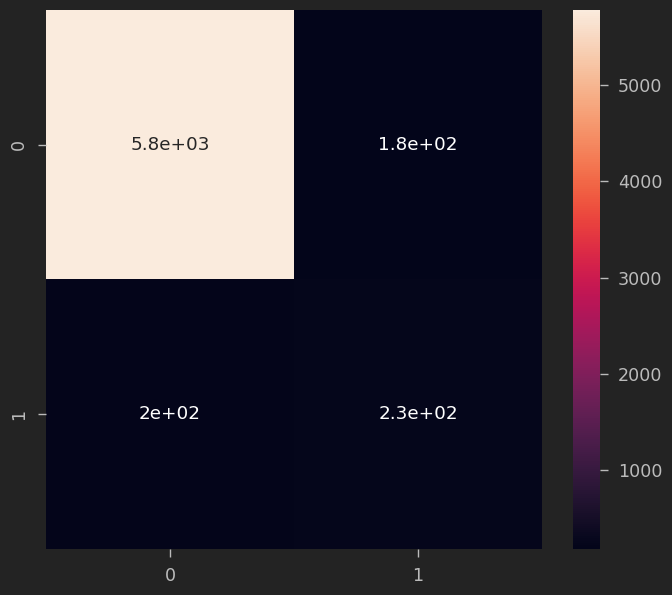

In [89]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot= True)

In [90]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5960
           1       0.57      0.54      0.55       433

    accuracy                           0.94      6393
   macro avg       0.77      0.75      0.76      6393
weighted avg       0.94      0.94      0.94      6393

